# **Movie Genres Classification**
*Predicting the genre of movie from just 1000 characters of the script.*

*Dataset Link: https://www.kaggle.com/c/moviegenres/overview*

In [1]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kaggle_movie_train.csv')

# **Exploring the dataset**

In [4]:
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:
df.shape

(22579, 3)

In [6]:
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [7]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

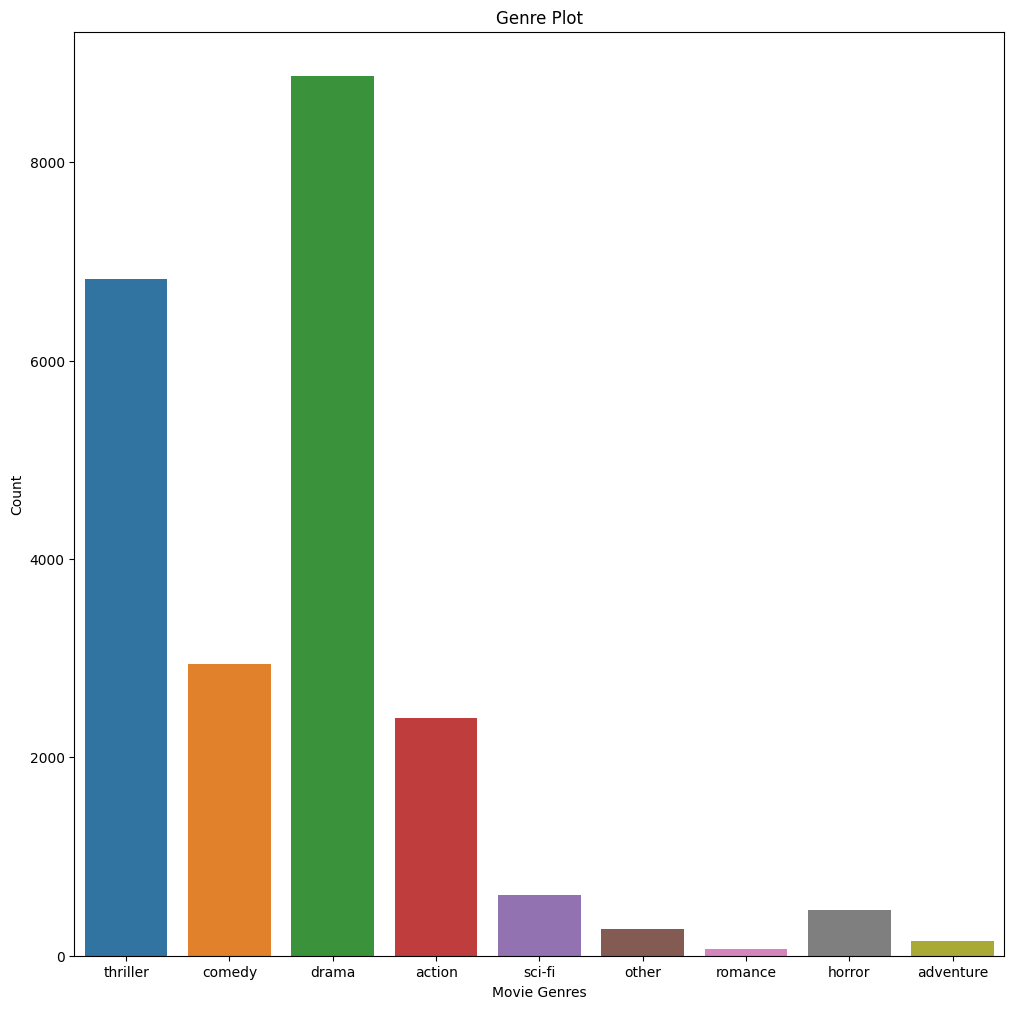

In [8]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [9]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [10]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [11]:
# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [12]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [13]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df.shape

(22579, 2)

In [15]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [16]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [17]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [18]:
len(corpus)

22579

In [19]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 20):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

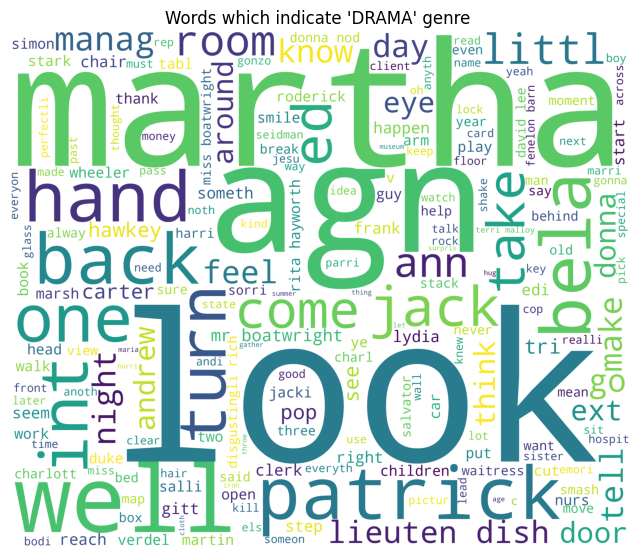

In [20]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

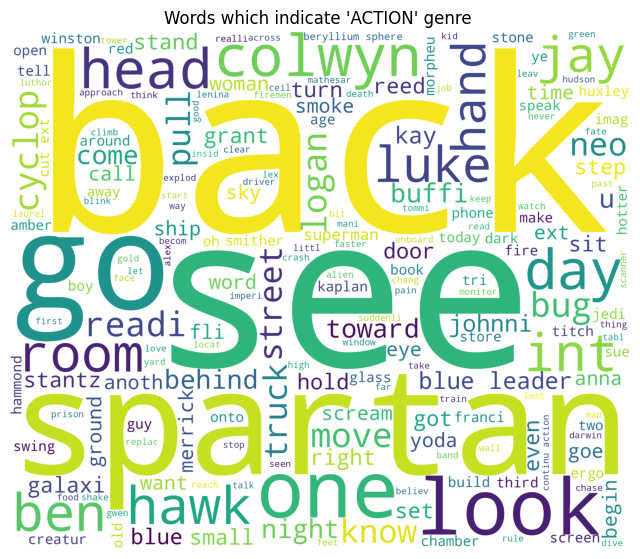

In [21]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

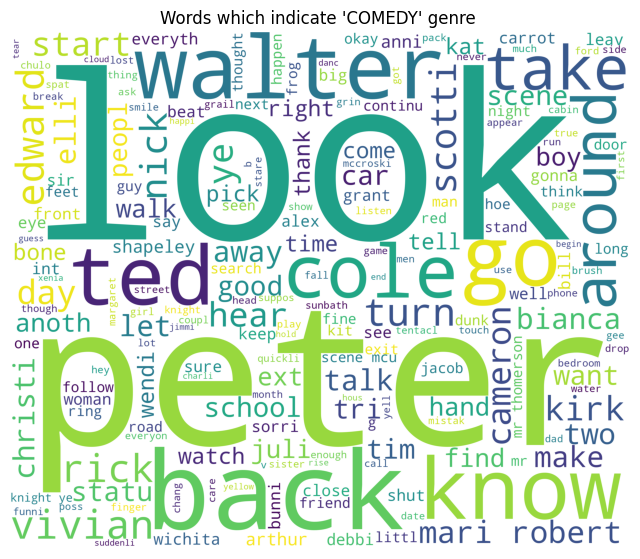

In [22]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [23]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [24]:
y = df['genre'].values

# **Model Building**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


## *Multinomial Naive Bayes*

In [26]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [27]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [28]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [30]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

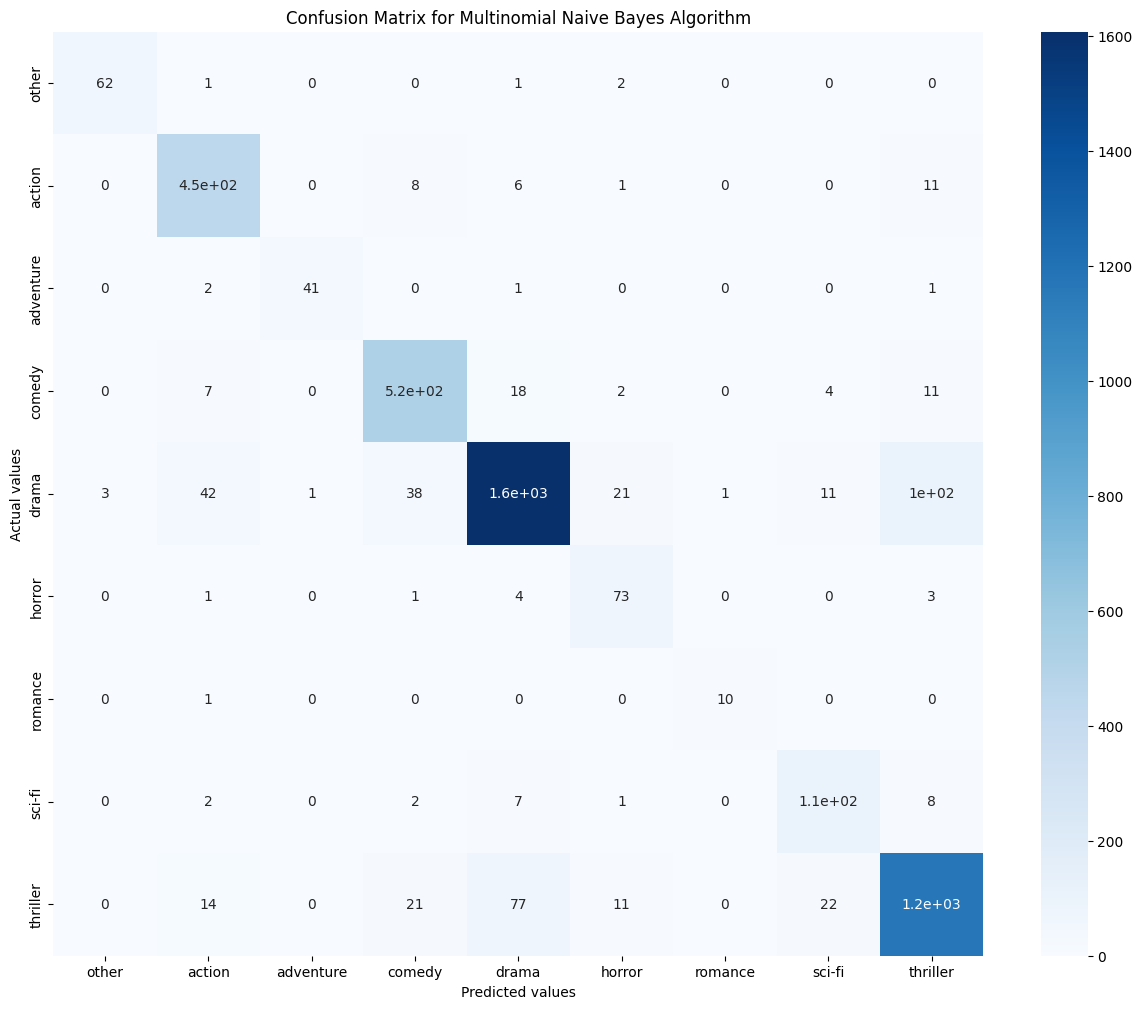

In [31]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [32]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [33]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# **Predictions**

In [34]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [35]:
# For generating random integer
from random import randint

In [36]:
# Loading test dataset
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/kaggle_movie_test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [37]:
test.shape

(5589, 2)

In [38]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [39]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: lk only in here. TARYN Is this Group? NEIL Well, unofficially. WILL Pretty soon there won't be enough of us left to call it Group. NEIL Listen up. Nancy's got something to say. NANCY pause I know who's trying to kill you. KINCAID Don't fucking humor us. We're not in the mood. NANCY He wears a dirty brown hat. this gets their attention He's horribly burned. all eyes on her He has razors on his right hand. TARYN Who is he? NANCY Freddy Krueger. He was a child murderer before he died. After he died, he became ...something worse. beat Six years ago Freddy killed my friends. He almost killed me. I thought I got rid of him but I guess he was too strong. Thick silence. The kids stare at her, flabbergasted, not knowing whether to believe or doubt. Then WILL Why is he after us? TARYN Yeah? What did we ever do? NANCY Not what you did. Your parents. My parents. They burned him alive. We're paying for their sins. softly You're the last of the Elm Street children. FAVORING THE KIDS as they 

In [40]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: uld beat up Mike Tyson? I mean before he started wiggin out and eating people's ears? DAVID No. JEREMY What if you worked out everyday for six months? You think you could beat him then? DAVID No. JEREMY What if you only ate foods that were good for you and you worked out everyday for a year? Jeremy is breathing hard as he puts the safety collars on the barbell and comes around to David's end of the bench. David lays back. DAVID No. David takes hold of the barbell. Beat. He takes a deep breath. The weight comes off the armrests of the bench. David lowers it to his chest and pushes it back up. He does just one more rep with serious strain. He puts the weight back on the armrest and sits up. DAVID How much did you put on there? David twists around and looks back at the barbell. He counts up the black metal circles. He turns back to Jeremy. DAVID You put too much. That's two hundred and fifty pounds. JEREMY How much can you lift? David looks back at the weights. DAVID That's the mo

In [41]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: . You're just in time fer a case that seems ta concern you. Guess you didn't care about the other proceedin's we been dealin' with here this mornin'. MARY I'm sorry. I was...busy. In the lab. GASPARILLA Well, you managed ta make it here jus' in time fer this case, didn't ya? RHODES replaces THE PROSECUTOR on the floor. He smiles at MARY pointedly as he starts his speech. RHODES Sir. In the matter of the State versus Private Tyler, I don't want to... MARY standing Sir, Tyler is innocent of any crime against the State. Captain Rhodes is... GASPARILLA with a mouthful of mango Miss Henried, I think you better... MARY ...Captain Rhodes is trying to... GASPARILLA spitting a wad of chewed pulp into his hand MISS HENRIED, SHUT THE HELL UP!!! MARY'S eyes indicate her frustration and anger but she does shut up. GASPARILLA plops the handful of fruit pulp onto the floor wiping his fingers on his military jacket. RHODES I don't want to take up a lot of time with this. Mr Tyler shot a prison

In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: lm. The hand floats eerily forward. DUKE LETO V.O. The sleeper must awaken. 139H. EXT. WATER NIGHT The last image which passes is foaming and spitting dark blue water. As the image passes, the black smoke trailing behind it obscures the picture to blackness. 140. EXT. ROCK DESERT NIGHT Through the darkness we move to Paul's clenched hand. It opens, revealing the signet ring in the very center of his palm. Paul looks upward to the moons of Arrakis. He looks back to the ring, then to his mother. PAUL Listen to me!... you wanted to know about my dreams... and I've just had a waking dream... do you know why?... JESSICA Calm yourself PAUL The spice! It's in everything here. The air, the soil, the food... It's like the Truthsayer drug..... It's a poison!!!! You knew the spice would change me. But thanks to your teachings it's changed my consciousness. I can see it... I can see it. JESSICA inner voice Is he....? PAUL You carry my unborn sister in your womb! JESSICA inner voice He know

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: bbles his ear, neck. He pulls her down to him, they kiss passionately. CUT TO 134 LAGOON NIGHT 134 All is still and quiet. A NOISE is heard from beneath the water. A faint almost ROAR, and the water is shaken by a giant form that sends a wave rolling to the CAMERA. Then, whatever it was turns and returns to the deep. The surface of the water rocks and trembles. CUT TO 135 SHARK ATTACK 135 They're in a feeding frenzy. They rip, tear, chewing on tuna, each other. Anything in the water. PHILIP O.S. Playful bastards, wouldn't you say? 136 REVEALING 136 Philip and Ike and Shelly watching the footage on a Moviola screen. They drink beer and watch. IKE Brings back such pleasant memories. PHILIP Was a rather enjoyable afternoon, wasn't it? SHELLY You want to show this? PHILIP Absolutely. The audience will stain their drawers. smiles I did. He walks for the door. Opens it. 137 PHILIP 137 Stands outside his EXHIBIT BOOTH, taking in the start of a new day. There's photos and signs PHILIP 